In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(None)

In [2]:
class Perceptron:
    def __init__(self, alpha, hid_layer):
        self.alpha = alpha
        self.act_f = np.vectorize(lambda s: 1.0/(1+np.math.exp(-2.0*alpha*s)))
        
        self.w_hid = np.random.rand(hid_layer)
        self.w_last = np.random.rand(hid_layer)
    
    def fit(self, test_inputs, test_outputs, divisor, epoches, step, inert):
        self.epoches = epoches
        
        dataset_len = len(test_inputs)
        
        for epoch in xrange(self.epoches):
            err = 0.0
            for batch_i in xrange(divisor):
                self.delta_w_last = 0
                self.delta_w_hid = 0
                
                start_i = batch_i*dataset_len/divisor
                end_i = (batch_i+1)*dataset_len/divisor 
                inp_batch = test_inputs[start_i : end_i]
                outp_batch = test_outputs[start_i : end_i]
                
                for t_inp, t_outp in zip(inp_batch, outp_batch):
                    outp = self.predict(t_inp)
                    err += np.linalg.norm(outp - t_outp)

                    delta_last = -outp*(1 - outp)*(t_outp - outp)
                    delta_hid = self.outps_hid*(1 - self.outps_hid)*delta_last*self.w_last

                    self.delta_w_last += inert*self.delta_w_last + (1 - inert)*step*delta_last*self.outps_hid
                    self.delta_w_hid  += inert*self.delta_w_hid + (1 - inert)*step*delta_hid*t_inp

                self.w_last += self.delta_w_last
                self.w_hid += self.delta_w_hid            

        print "Epoch {}, Error = {}".format(epoch, err)
    
    def predict(self, x):
        self.outps_hid = self.act_f(x*self.w_hid)
        return (np.sum(self.outps_hid * self.w_last))

In [3]:
a, b, n = 0, 10, 20

mu = 0
sigma = 1

f = np.vectorize(lambda x: b-x)
rands = np.random.normal(mu, sigma, size=n)

Epoch 99, Error = 28.976587724


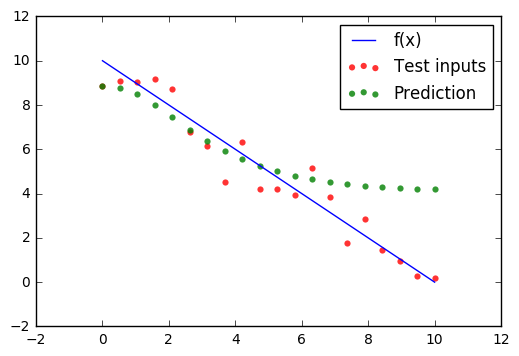

In [4]:
test_inp  = np.linspace(a, b, n)
test_outp = f(test_inp) + rands

nn = Perceptron(1, 20)
nn.fit(test_inp, test_outp, 2, 100, 1e-5, 0.5)
predictions = np.array([nn.predict(x) for x in test_inp])

plt.plot(test_inp, f(test_inp), c='b', label='f(x)')
plt.scatter(test_inp, test_outp, c='r', alpha=0.8, linewidths=0, label='Test inputs')
plt.scatter(test_inp, predictions, c='g', alpha=0.8, linewidths=0, label='Prediction')
plt.legend()
plt.show()

In [5]:
a, b, n = 0, 10, 10

mu = 0
sigma = 0.5

f = np.vectorize(lambda x: x)
rands = np.random.normal(mu, sigma, size=n)

Epoch 99, Error = 21.7512311669


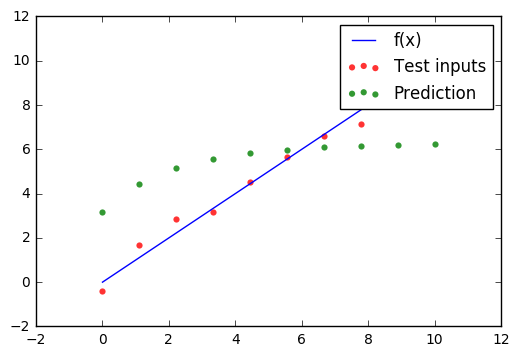

In [6]:
test_inp  = np.linspace(a, b, n)
test_outp = f(test_inp) + rands

nn = Perceptron(1, 20)
nn.fit(test_inp, test_outp, 2, 100, 1e-5, 0.5)
predictions = np.array([nn.predict(x) for x in test_inp])

plt.plot(test_inp, f(test_inp), c='b', label='f(x)')
plt.scatter(test_inp, test_outp, c='r', alpha=0.8, linewidths=0, label='Test inputs')
plt.scatter(test_inp, predictions, c='g', alpha=0.8, linewidths=0, label='Prediction')
plt.legend()
plt.show()